### Load processed Data

In [76]:
### Load processed Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df =pd.read_csv('eda_processed_adult.csv')

In [77]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Get dummies

In [78]:
df_model = df[['workclass', 'relationship', 'education', 'marital-status', 'occupation', 'race', 'gender', 'native-country', 'income']]

In [106]:
if 'normalized-losses' in df_model.columns:
	df_model.drop(axis='columns', labels='normalized-losses')
df_model.dropna(axis='index', how="any")

,workclass,relationship,education,marital-status,occupation,race,gender,native-country,income
0,Private,Own-child,11th,Never-married,Machine-op-inspct,Black,Male,United-States,<=50K
1,Private,Husband,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,United-States,<=50K
2,Local-gov,Husband,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,United-States,>50K
3,Private,Husband,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,United-States,>50K
5,Private,Not-in-family,10th,Never-married,Other-service,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48785,Private,Wife,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,United-States,<=50K
48786,Private,Husband,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,United-States,>50K
48787,Private,Unmarried,HS-grad,Widowed,Adm-clerical,White,Female,United-States,<=50K
48788,Private,Own-child,HS-grad,Never-married,Adm-clerical,White,Male,United-States,<=50K


In [107]:
df_dum = pd.get_dummies(df_model)
df_dum.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
5,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


### Train the model

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X = df_dum.drop('income_>50K', axis=1)
y = df_dum['income_>50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_matrix_lr = confusion_matrix(y_test, y_pred)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)
print(f'Logistic Regression Accuracy: {accuracy}')
print('Precision is ', precision)
print('Recall is ', recall)
print('F1 is ', f1)
print('Confusion Matrix ', confusion_matrix_lr)
print('Score Test', model.score(X_train, y_train))
print('Score Train', model.score(X_test, y_test))


Logistic Regression Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[6842    0]
 [   0 2193]]
Score Test 1.0
Score Train 1.0


### Error Finding

In [82]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


np.float64(-8.404232023250934e-08)

In [83]:
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

np.float64(-0.26000112151567917)

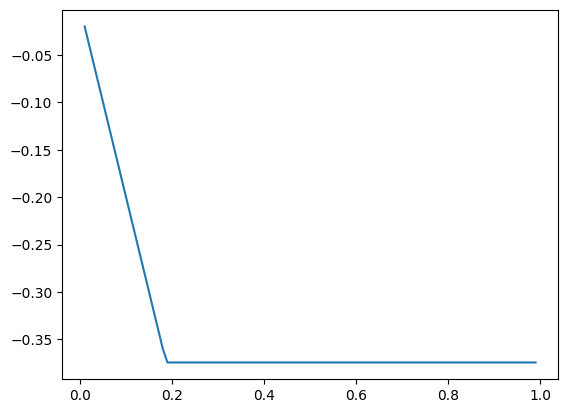

In [84]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
plt.plot(alpha,error)

In [89]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.01,-0.02


### Multiple Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Train the multiple linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlr = mlr_model.predict(X_test)

# Convert predictions to binary outcomes
y_pred_mlr_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_mlr]

# Calculate the accuracy
accuracy_mlr = accuracy_score(y_test, y_pred_mlr_binary)
precision_mlr = precision_score(y_test, y_pred_mlr_binary, average='weighted')
recall_mlr = recall_score(y_test, y_pred_mlr_binary, average='weighted')
f1_mlr = f1_score(y_test, y_pred_mlr_binary, average='weighted')
confusion_matrix_mlr = confusion_matrix(y_test, y_pred_mlr_binary)
score_test_mlr = mlr_model.score(X_test, y_test)
score_train_mlr = mlr_model.score(X_train, y_train)
print(f'Multiple Linear Regression Accuracy: {accuracy_mlr}')
print('Precision is ', precision_mlr)
print('Recall is ', recall_mlr)
print('F1 is ', f1_mlr)
print('Confusion Matrix ', confusion_matrix_mlr)
print("The bias is ", mlr_model.intercept_)
print("Score Train", score_train_mlr)
print("Score Test", score_test_mlr)
print("The feature coefficients are ", mlr_model.coef_)


Multiple Linear Regression Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[6842    0]
 [   0 2193]]
The bias is  1.027910430516636
Score Train 1.0
Score Test 1.0
The feature coefficients are  [ 1.69892693e-02  1.69892693e-02  1.69892693e-02  1.69892693e-02
  1.69892693e-02  1.69892693e-02  1.69892693e-02  1.92434686e-02
  1.92434686e-02  1.92434686e-02  1.92434686e-02  1.92434686e-02
  1.92434686e-02  2.46134078e-03  2.46134078e-03  2.46134078e-03
  2.46134078e-03  2.46134078e-03  2.46134078e-03  2.46134078e-03
  2.46134078e-03  2.46134078e-03  2.46134078e-03  2.46134078e-03
  2.46134078e-03  2.46134078e-03  2.46134078e-03  2.46134078e-03
  2.46134078e-03 -6.02836793e-02 -6.02836793e-02 -6.02836793e-02
 -6.02836793e-02 -6.02836793e-02 -6.02836793e-02 -6.02836793e-02
 -1.98945632e-02 -1.98945632e-02 -1.98945632e-02 -1.98945632e-02
 -1.98945632e-02 -1.98945632e-02 -1.98945632e-02 -1.98945632e-02
 -1.98945632e-02 -1.98945632e-02 -1.98945632e-02 -1.98945632e-0

### RandomForestClassifier Model

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=None)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy, precision, recall, F1 score and confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
score_test_rf = rf_model.score(X_test, y_test)
score_train_rf = rf_model.score(X_train, y_train)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print('Precision is ', precision_rf)
print('Recall is ', recall_rf)
print('F1 is ', f1_rf)
print('Confusion Matrix ', confusion_matrix_rf)
print("Score Train", score_train_rf)
print("Score Test", score_test_rf)


Random Forest Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[6842    0]
 [   0 2193]]
Score Train 1.0
Score Test 1.0


### Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate the accuracy, precision, recall, F1 score and confusion matrix
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
score_test_gb = gb_model.score(X_test, y_test)
score_train_gb = gb_model.score(X_train, y_train)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print('Precision is ', precision_gb)
print('Recall is ', recall_gb)
print('F1 is ', f1_gb)
print('Confusion Matrix ', confusion_matrix_gb)
print("Score Train", score_train_gb)
print("Score Test", score_test_gb)

Gradient Boosting Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[6842    0]
 [   0 2193]]
Score Train 1.0
Score Test 1.0


### Support Vector Machine, K-Nearest Neighbors, and XGBoost

In [88]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Rename columns to remove invalid characters
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_test.columns]

# Train the SVM model
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
# Calculate the accuracy, precision, recall, F1 score and confusion matrix for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
score_test_svm = svm_model.score(X_test, y_test)
score_train_svm = svm_model.score(X_train, y_train)
print(f'SVM Accuracy: {accuracy_svm}')
print('Precision is ', precision_svm)
print('Recall is ', recall_svm)
print('F1 is ', f1_svm)
print('Confusion Matrix ', confusion_matrix_svm)
print("Score Train", score_train_svm)
print("Score Test", score_test_svm)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calculate the accuracy, precision, recall, F1 score and confusion matrix for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
score_test_knn = knn_model.score(X_test, y_test)
score_train_knn = knn_model.score(X_train, y_train)
print(f'KNN Accuracy: {accuracy_knn}')
print('Precision is ', precision_knn)
print('Recall is ', recall_knn)
print('F1 is ', f1_knn)
print('Confusion Matrix ', confusion_matrix_knn)
print("Score Train", score_train_knn)
print("Score Test", score_test_knn)

# Train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy, precision, recall, F1 score and confusion matrix for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
score_test_xgb = xgb_model.score(X_test, y_test)
score_train_xgb = xgb_model.score(X_train, y_train)
print(f'XGBoost Accuracy: {accuracy_xgb}')
print('Precision is ', precision_xgb)
print('Recall is ', recall_xgb)
print('F1 is ', f1_xgb)
print('Confusion Matrix ', confusion_matrix_xgb)
print("Score Train", score_train_xgb)
print("Score Test", score_test_xgb)

SVM Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[6842    0]
 [   0 2193]]
Score Train 1.0
Score Test 1.0
KNN Accuracy: 0.9737686773657996
Precision is  0.9737875281696636
Recall is  0.9737686773657996
F1 is  0.9734847728754531
Confusion Matrix  [[6790   52]
 [ 185 2008]]
Score Train 0.9798561151079137
Score Test 0.9737686773657996
XGBoost Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[6842    0]
 [   0 2193]]
Score Train 1.0
Score Test 1.0


### Lasso regression

In [90]:
from sklearn.linear_model import Lasso

# Train the Lasso regression model
lasso_model = Lasso(alpha=0.1, max_iter=1000)
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Convert predictions to binary outcomes
y_pred_lasso_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_lasso]

# Calculate the accuracy
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_binary)
precision_lasso = precision_score(y_test, y_pred_lasso_binary, average='weighted')
recall_lasso = recall_score(y_test, y_pred_lasso_binary, average='weighted')
f1_lasso = f1_score(y_test, y_pred_lasso_binary, average='weighted')
confusion_matrix_lasso = confusion_matrix(y_test, y_pred_lasso_binary)
score_test_lasso = lasso_model.score(X_test, y_test)
score_train_lasso = lasso_model.score(X_train, y_train)

print(f'Lasso Regression Accuracy: {accuracy_lasso}')
print('Precision is ', precision_lasso)
print('Recall is ', recall_lasso)
print('F1 is ', f1_lasso)
print('Confusion Matrix ', confusion_matrix_lasso)
print('Score Test', score_test_lasso)
print('Score Train', score_train_lasso)

Lasso Regression Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[6842    0]
 [   0 2193]]
Score Test 0.7143926266886215
Score Train 0.7144594338200165


### Decision Tree

In [91]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=None)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
score_test_dt = dt_model.score(X_test, y_test)
score_train_dt = dt_model.score(X_train, y_train)

print(f'Decision Tree Accuracy: {accuracy_dt}')
print('Precision is ', precision_dt)
print('Recall is ', recall_dt)
print('F1 is ', f1_dt)
print('Confusion Matrix ', confusion_matrix_dt)
print('Score Test', score_test_dt)
print('Score Train', score_train_dt)

Decision Tree Accuracy: 1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Confusion Matrix  [[6842    0]
 [   0 2193]]
Score Test 1.0
Score Train 1.0


In [92]:
# Create a DataFrame to store the models and their metrics
df_metrics = pd.DataFrame({
    'Model': ['Logistic Regression','Multiple Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'XGBoost', 'Lasso Regression', 'Decision Tree'],
    'Accuracy': [accuracy, accuracy_mlr, accuracy_rf, accuracy_gb, accuracy_svm, accuracy_knn, accuracy_xgb, accuracy_lasso, accuracy_dt],
    'Precision': [precision, precision_mlr, precision_rf, precision_gb, precision_svm, precision_knn, precision_xgb, precision_lasso, precision_dt],
    'Recall': [recall, recall_mlr, recall_rf, recall_gb, recall_svm, recall_knn, recall_xgb, recall_lasso, recall_dt],
    'F1 Score': [f1, f1_mlr, f1_rf, f1_gb, f1_svm, f1_knn, f1_xgb, f1_lasso, f1_dt],
    'Score_Train': [score_train, score_train_mlr, score_train_rf, score_train_gb, score_train_svm, score_train_knn, score_train_xgb, score_train_lasso, score_train_dt],
    'Score_Test': [score_test, score_test_mlr, score_test_rf, score_test_gb, score_test_svm, score_test_knn, score_test_xgb, score_test_lasso, score_test_dt],
    'confusion_matrix': [confusion_matrix_lr, confusion_matrix_mlr, confusion_matrix_rf, confusion_matrix_gb, confusion_matrix_svm, confusion_matrix_knn, confusion_matrix_xgb, confusion_matrix_lasso, confusion_matrix_dt],
})
# Display the DataFrame
print(df_metrics)
model_df = df_metrics.set_index('Model')

                        Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  1.000000   1.000000  1.000000  1.000000   
1  Multiple Linear Regression  1.000000   1.000000  1.000000  1.000000   
2               Random Forest  1.000000   1.000000  1.000000  1.000000   
3           Gradient Boosting  1.000000   1.000000  1.000000  1.000000   
4                         SVM  1.000000   1.000000  1.000000  1.000000   
5                         KNN  0.973769   0.973788  0.973769  0.973485   
6                     XGBoost  1.000000   1.000000  1.000000  1.000000   
7            Lasso Regression  1.000000   1.000000  1.000000  1.000000   
8               Decision Tree  1.000000   1.000000  1.000000  1.000000   

   Score_Train  Score_Test           confusion_matrix  
0     1.000000    1.000000     [[6842, 0], [0, 2193]]  
1     1.000000    1.000000     [[6842, 0], [0, 2193]]  
2     1.000000    1.000000     [[6842, 0], [0, 2193]]  
3     1.000000    1.000000     [[68

### Visualization of Model

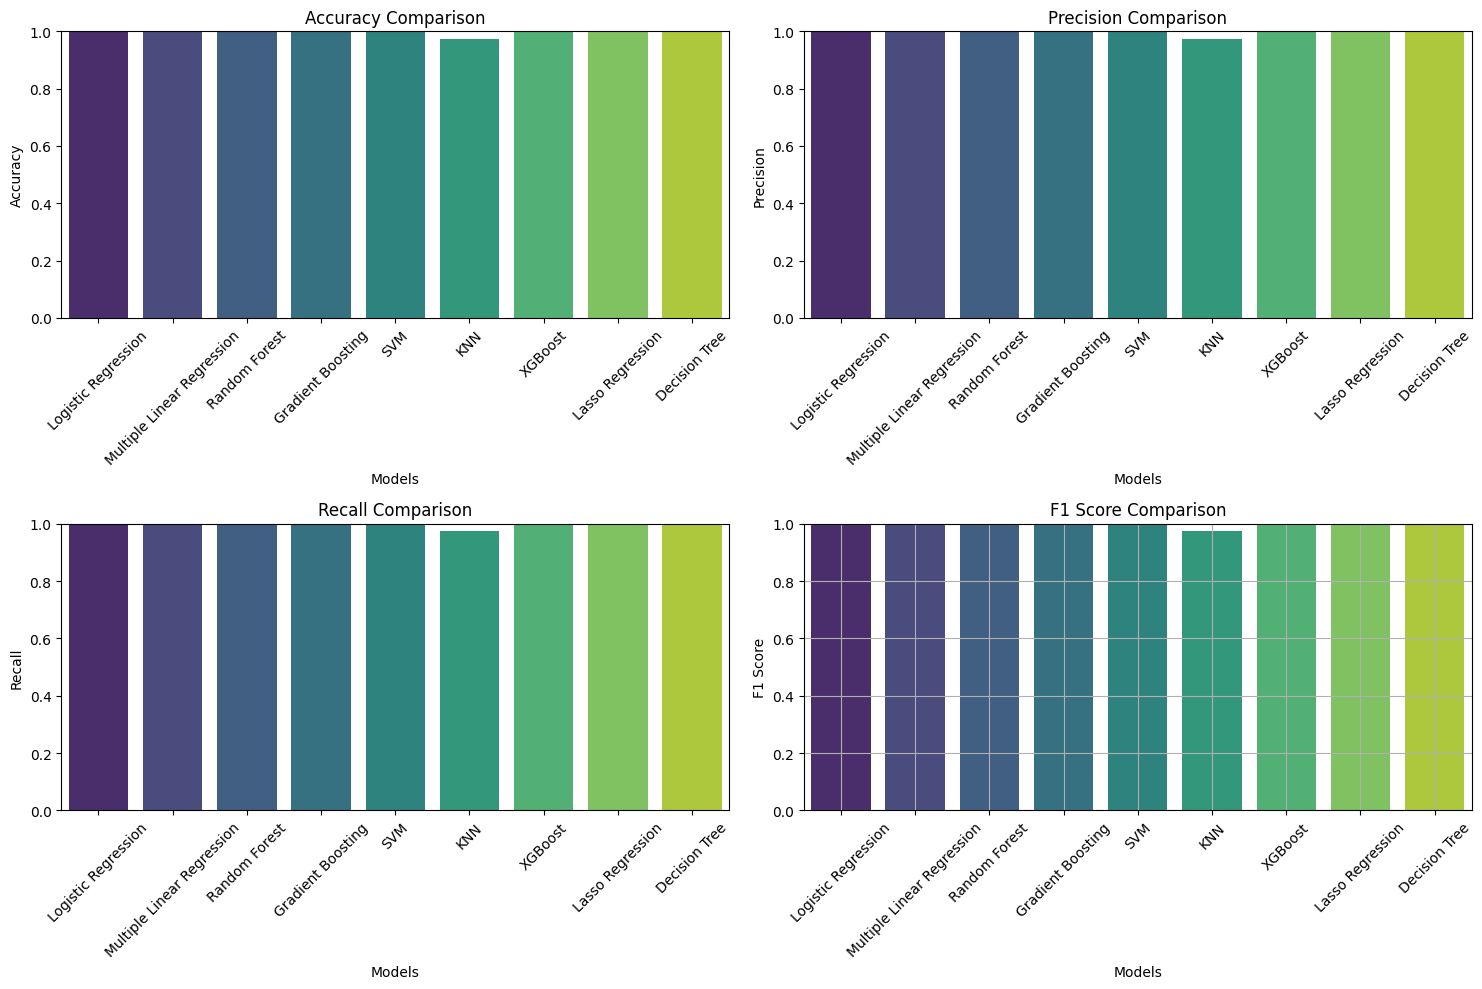

In [108]:
import warnings

# Suppress specific warnings if needed
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

plt.figure(figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(
        x=model_df.index, 
        y=model_df[metric], 
        palette='viridis', 
        hue=model_df.index,  # Assign `x` to `hue`
        dodge=False, 
        legend=False  # Disable legend to avoid clutter
    )
    plt.title(f'{metric} Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.xlabel('Models')

plt.tight_layout()
plt.grid(True)
plt.show()


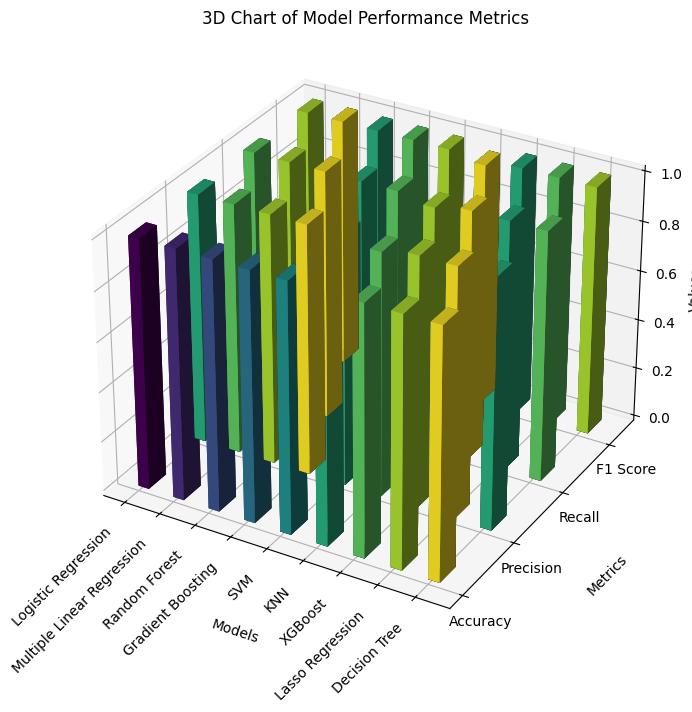

In [96]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the 3D bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the metrics and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(model_df.index))  # Model indices
y = np.arange(len(metrics))  # Metric indices
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()
z = np.zeros_like(x)  # Base of the bars

# Flatten the values for the 3D bar chart
values = np.array([model_df[metric].values for metric in metrics]).ravel()

# Define the width, depth, and height of the bars
dx = dy = 0.3
dz = values

# Define colors for each model
colors = plt.cm.viridis(np.linspace(0, 1, len(model_df.index)))

# Create the 3D bar chart with different colors for each model
for i in range(len(model_df.index)):
    ax.bar3d(x[i::len(metrics)], y[i::len(metrics)], z[i::len(metrics)], dx, dy, dz[i::len(metrics)], color=colors[i], zsort='average')

# Set the labels and title
ax.set_xlabel('Models', labelpad=20)
ax.set_ylabel('Metrics', labelpad=20)
ax.set_zlabel('Values')
ax.set_xticks(np.arange(len(model_df.index)))
ax.set_xticklabels(model_df.index, rotation=45, ha='right')
ax.set_yticks(np.arange(len(metrics)))
ax.set_yticklabels(metrics)
ax.set_title('3D Chart of Model Performance Metrics')

# Show the plot
plt.show()

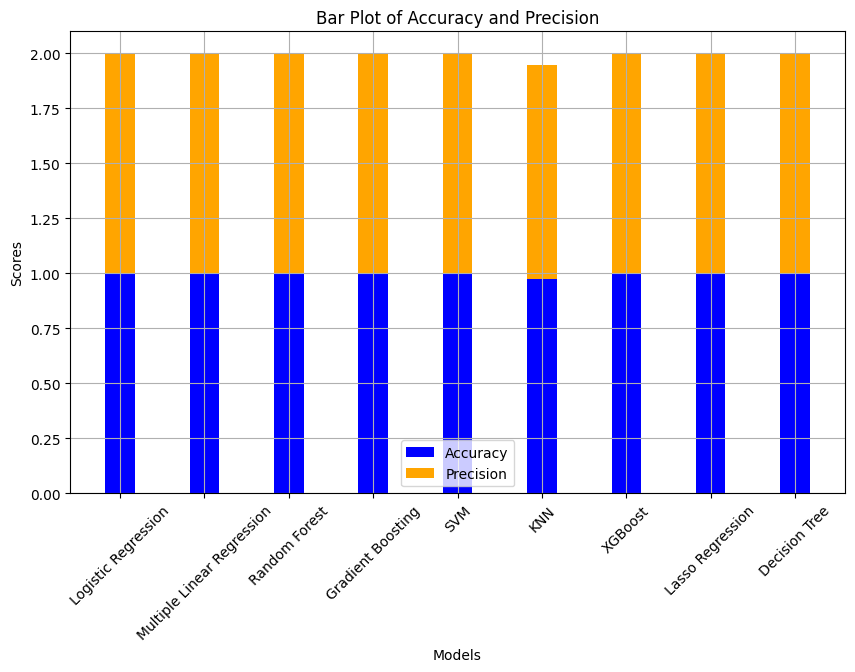

In [97]:
# Create a bar plot for Accuracy and Precision
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # the width of the bars

# Plot Accuracy
ax.bar(df_metrics['Model'], df_metrics['Accuracy'], width, label='Accuracy', color='blue')

# Plot Precision
ax.bar(df_metrics['Model'], df_metrics['Precision'], width, bottom=df_metrics['Accuracy'], label='Precision', color='orange')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Bar Plot of Accuracy and Precision')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Identify Best Model

In [98]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 1.0


In [99]:
# Find the best model based on accuracy, precision, recall, and F1 score
best_model = df_metrics.loc[df_metrics[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1).idxmax()]

print("Best Model:")
print(best_model)
best_model_name = model_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1).idxmax()
print(f"The best model is: {best_model_name}")

Best Model:
Model                  Logistic Regression
Accuracy                               1.0
Precision                              1.0
Recall                                 1.0
F1 Score                               1.0
Score_Train                            1.0
Score_Test                             1.0
confusion_matrix    [[6842, 0], [0, 2193]]
Name: 0, dtype: object
The best model is: Logistic Regression


### Identify Features Prediction

In [101]:
# Create Random Forest model to analyze feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Print top 5 most important features
print("\nTop 5 most important features:")
print(feature_importance.head())


Top 5 most important features:
                              feature  importance
98                        income_=50K    0.776249
31  marital-status_Married-civ-spouse    0.038500
7                relationship_Husband    0.030363
33       marital-status_Never-married    0.018051
39         occupation_Exec-managerial    0.012018


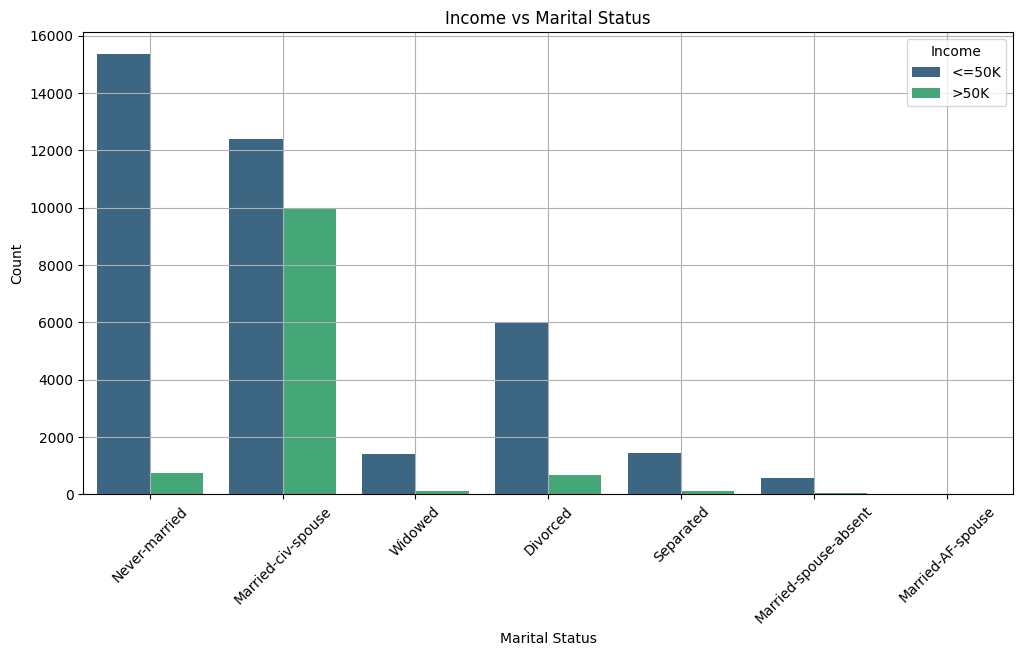

In [103]:
# Create a bar plot for marital status vs income
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital-status', hue='income', palette='viridis')
plt.title('Income vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.grid(True)
plt.show()

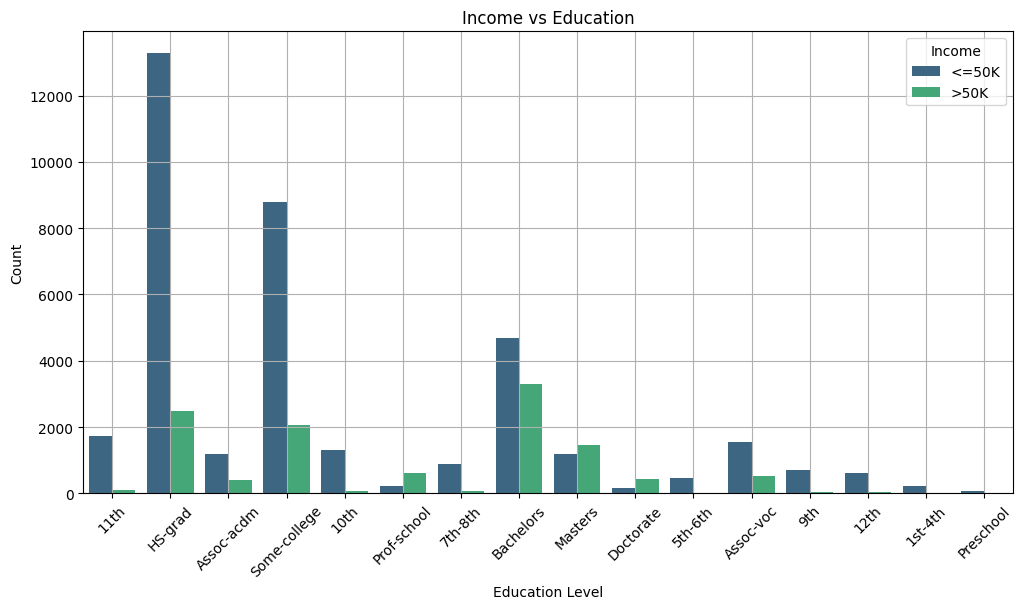

In [104]:
# Create a bar plot for income vs education
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income', palette='viridis')
plt.title('Income vs Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.grid(True)
plt.show()

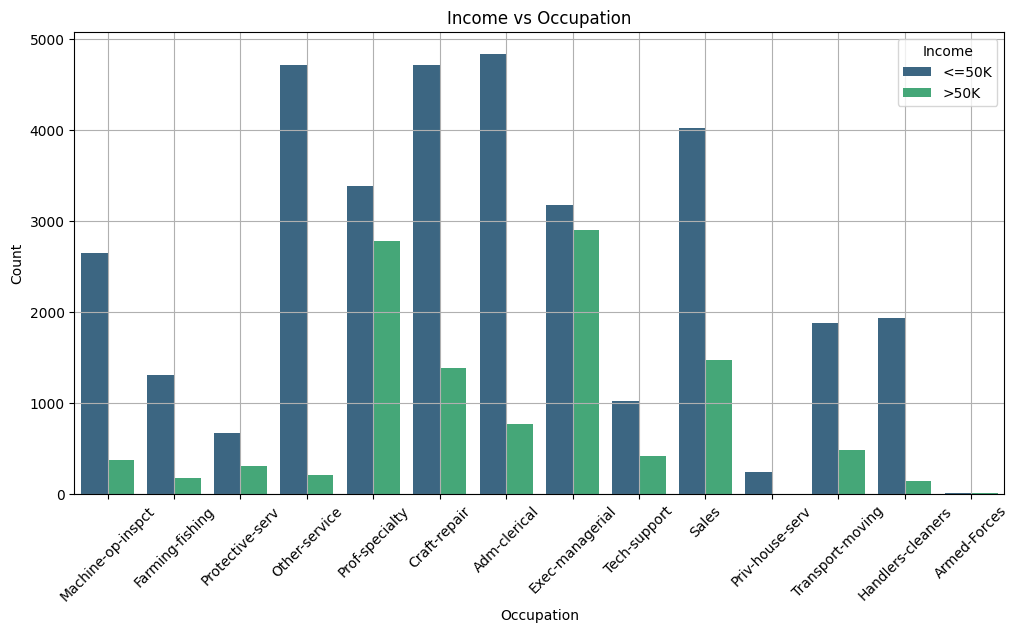

In [105]:
# Create a bar plot for income vs occupation
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='occupation', hue='income', palette='viridis')
plt.title('Income vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.grid(True)
plt.show()
